In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load processed data for star 
data_star1 = pd.read_csv('data_star1.csv')

In [3]:
# isolate the features from the data 

features = data_star1[['flux_diff', 'flux_roll_mean', 'flux_roll_std', 'flux_ratio']].values

In [4]:
# Check for NaN or infinity values in the features
print(np.isnan(features).any())  # True if any NaN values are present
print(np.isinf(features).any())  # True if any infinite values are present

False
False


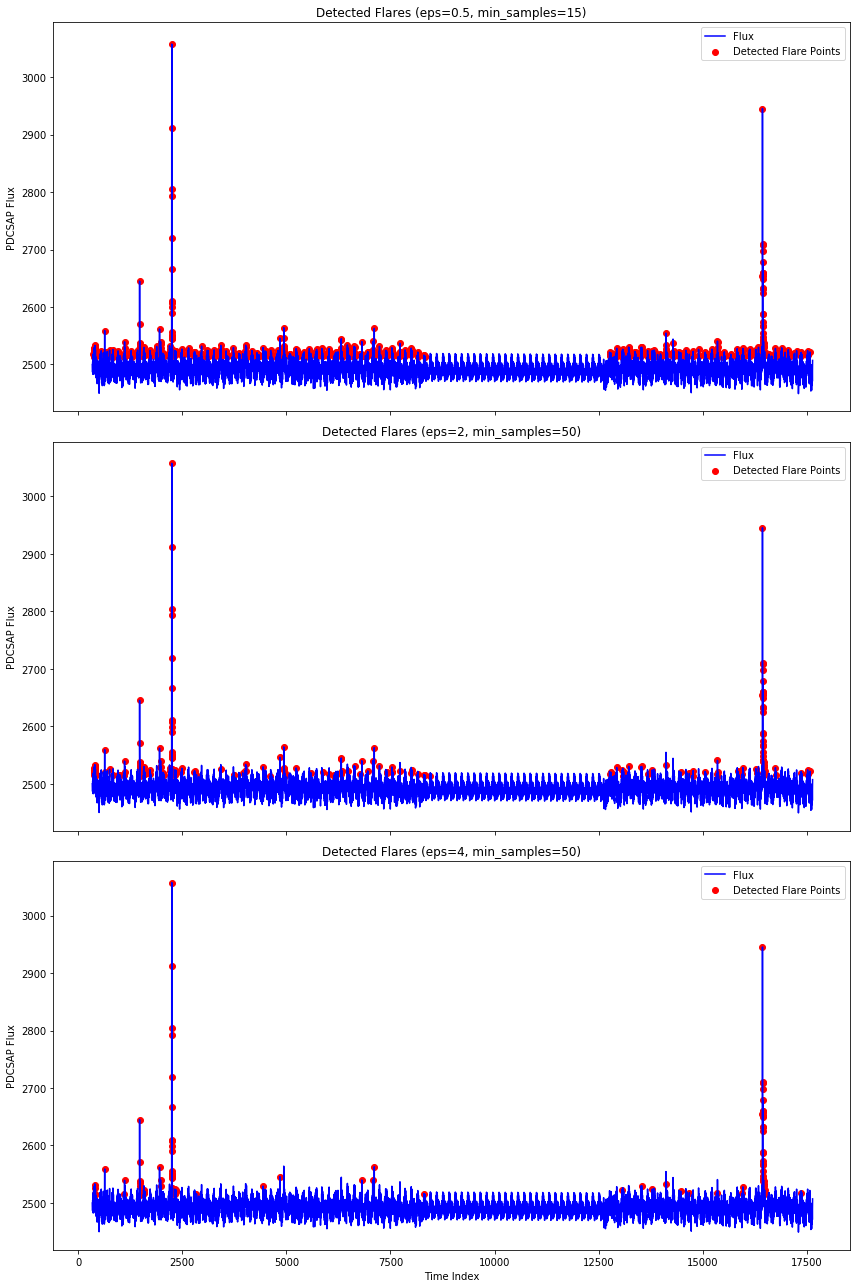

In [5]:
# DBSCAN Algorithm 

from sklearn.cluster import DBSCAN

# Define different combinations of (eps, min_samples)
param_combinations = [(0.5, 15),(2, 50), (4, 50)]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)

for i, (eps, min_samples) in enumerate(param_combinations):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)

    # Add cluster labels back to the original data
    data_star1['cluster'] = clusters
    
    # Compute a stricter flux threshold (e.g., top 5% brightness)
    flux_thresh = data_star1['pdcsap_flux'].quantile(0.95)
    
    # Mark detected flares as outliers above flux threshold
    data_star1['is_flare'] = ((data_star1['cluster'] == -1) & (data_star1['pdcsap_flux'] > flux_thresh)).astype(int)

    # Filter only flare points
    flare_points = data_star1[data_star1['is_flare'] == 1]

    # Plot results
    ax = axes[i]
    ax.plot(data_star1['index'], data_star1['pdcsap_flux'], label='Flux', color='blue')
    ax.scatter(flare_points['index'], flare_points['pdcsap_flux'], color='red', label='Detected Flare Points')
    
    ax.legend()
    ax.set_title(f'Detected Flares (eps={eps}, min_samples={min_samples})')
    ax.set_ylabel('PDCSAP Flux')

# Set x-label only for the last subplot
axes[-1].set_xlabel('Time Index')

plt.tight_layout()
#plt.savefig("star1_flares.png", dpi=300)
plt.show()